In [1]:
#importing Keras, Library for deep learning 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import  img_to_array

import numpy as np
import cv2
# Image manipulations and arranging data
import os
from PIL import Image
from sklearn.cross_validation import train_test_split


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# input image dimensions
m,n = 50,50

path1="test/"
path2="train/"

classes=os.listdir(path2)
x=[]
y=[]
for fol in classes:
    print(fol)
    imgfiles=os.listdir(path2 + '/' + fol);
    for img in imgfiles:
        im=Image.open(path2+'/'+fol+'/'+img);
        im=im.convert(mode='RGB')
        imrs=im.resize((m,n))
        imrs=img_to_array(imrs)/255;
        imrs=imrs.transpose(2,0,1);
        imrs=imrs.reshape(3,m,n);
        x.append(imrs)
        y.append(fol)
        
x=np.array(x);
y=np.array(y);


knife
short_gun
weaponless


In [88]:
print(len(x))
print(len(y))

3752
3752


In [102]:
batch_size=32
nb_classes=len(classes)
nb_epoch=20
nb_filters=32
nb_pool=2
nb_conv=3

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=4)

uniques, id_train=np.unique(y_train,return_inverse=True)
Y_train=np_utils.to_categorical(id_train,nb_classes)
uniques, id_test=np.unique(y_test,return_inverse=True)
Y_test=np_utils.to_categorical(id_test,nb_classes)

In [90]:
#implement a CNN architecture 
model= Sequential()
model.add(Convolution2D(nb_filters,nb_conv,nb_conv,border_mode='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'));
model.add(Convolution2D(nb_filters,nb_conv,nb_conv));
model.add(Activation('relu'));
model.add(MaxPooling2D(pool_size=(nb_pool,nb_pool), dim_ordering="th"));
model.add(Dropout(0.5));
model.add(Flatten());
model.add(Dense(128));
model.add(Dropout(0.5));
model.add(Dense(nb_classes));
model.add(Activation('softmax'));
model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(3, 50, 50..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  import sys


In [103]:
#nb_epoch=1
#batch_size=5
history = model.fit(x_train,Y_train,batch_size=batch_size,nb_epoch=nb_epoch,verbose=1,validation_data=(x_test, Y_test))
model.save('second_model.h5')

Train on 376 samples, validate on 94 samples
Epoch 1/20
 96/376 [======>.......................] - ETA: 0s - loss: 1.9513 - acc: 0.7812

C:\ProgramData\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


376/376 [==============================] - 1s 1ms/step - loss: 1.1634 - acc: 0.7926 - val_loss: 0.2053 - val_acc: 0.9149
Epoch 2/20
376/376 [==============================] - 1s 1ms/step - loss: 0.3217 - acc: 0.8830 - val_loss: 0.1191 - val_acc: 0.9787
Epoch 3/20
376/376 [==============================] - 1s 1ms/step - loss: 0.1983 - acc: 0.9468 - val_loss: 0.0985 - val_acc: 0.9894
Epoch 4/20
376/376 [==============================] - 1s 1ms/step - loss: 0.3138 - acc: 0.8910 - val_loss: 0.0682 - val_acc: 0.9787
Epoch 5/20
376/376 [==============================] - 1s 1ms/step - loss: 0.0825 - acc: 0.9814 - val_loss: 0.0526 - val_acc: 0.9787
Epoch 6/20
376/376 [==============================] - 1s 1ms/step - loss: 0.1222 - acc: 0.9521 - val_loss: 0.0337 - val_acc: 1.0000
Epoch 7/20
376/376 [==============================] - 1s 1ms/step - loss: 0.1286 - acc: 0.9601 - val_loss: 0.0163 - val_acc: 1.0000
Epoch 8/20
376/376 [==============================] - 1s 1ms/step - loss: 0.0646 - acc:

In [24]:
print("printing model summary:  ", model.summary() )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 3, 50, 32)         14432     
_________________________________________________________________
activation_7 (Activation)    (None, 3, 50, 32)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 48, 32)         9248      
_________________________________________________________________
activation_8 (Activation)    (None, 1, 48, 32)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 24, 16)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 24, 16)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 384)               0         
__________

In [14]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


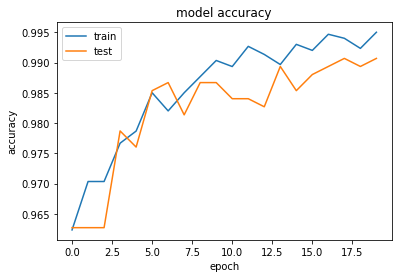

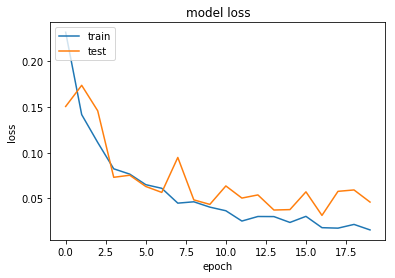

In [92]:
# Visualize training history
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model-accuracy.png')   # save the figure to file

In [5]:
from keras.models import load_model
model=load_model("firearm_model.h5")

In [93]:
image = cv2.imread('C:\\Users\\umair\\Desktop\\FYP\\weapon_detection\\test\\3.jpg', )
print(image.shape)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)
ims = cv2.resize(image, (50, 50))
ims=img_to_array(imrs)/255
ims=imrs.transpose(2,0,1)
ims=imrs.reshape(3,m,n)
x=[]
x.append(imrs)
x=np.array(x)
pred = model.predict(x)

(189, 266, 3)
(189, 266, 3)


In [82]:
print(pred)
print(pred[0])
print(pred[0][0])
predictions = pred

[[4.2479995e-05 9.9056095e-01 9.3965661e-03]]
[4.2479995e-05 9.9056095e-01 9.3965661e-03]
4.2479995e-05


In [83]:
result = max(pred[0][0], pred[0][1], pred[0][2])
string = ""
if result == pred[0][0]:
    string = "Knife Detected: " + str(pred[0][0])
elif result == pred[0][1]:
    string = "Short Gun Detected: " + str(pred[0][1])
elif result == pred[0][2]:
    string = "No Gun Detected: " + str(pred[0][2])
    
print(string)

Short Gun Detected: 0.99056095


In [9]:
webcam = cv2.VideoCapture('knife_video.mp4')
#cv2.namedWindow("Gun Detection", cv2.WINDOW_AUTOSIZE)
#files=os.listdir(path1)

while(True):
    _, img = webcam.read()
    #img=files[i]
    imrs = cv2.resize(img, (m,n))
    imrs=img_to_array(imrs)/255
    imrs=imrs.transpose(2,0,1)
    imrs=imrs.reshape(3,m,n)
    x=[]
    x.append(imrs)
    x=np.array(x)
    predictions = model.predict(x)
    #print("printing model predictions:   ",predictions)
    result = max(predictions[0][0], predictions[0][1], predictions[0][2])
    if result == predictions[0][0]:
        string = "Knife Detected: " + str(predictions[0])
    elif result == predictions[0][1]:
        string = "Short Gun Detected: " + str(predictions[0])
    elif result == predictions[0][2]:
        string = "No Weapon Detected: " + str(predictions[0])
    else:
        string = "No Weapon Detected: " + str(predictions[0])

    print(predictions[0])    
    cv2.putText(img, string , (5, 100), cv2.FONT_HERSHEY_PLAIN, 1, (66, 53, 243), 2)

    #cv2.putText(img, "ESC to exit", (5, img.shape[0] - 5), cv2.FONT_HERSHEY_PLAIN, 1.3, (66, 53, 243), 2, cv2.LINE_AA)
    cv2.imshow("Gun Detection", img) # live feed in external
    if cv2.waitKey(40) & 0xFF == 27:
        cv2.destroyAllWindows()
        break
    cv2.waitKey(10)
break


[0.00275957 0.01897274 0.97826767]
[4.3891298e-04 1.9223195e-02 9.8033786e-01]
[4.3777644e-04 1.9115195e-02 9.8044705e-01]
[4.3877191e-04 1.9151822e-02 9.8040938e-01]
[0.00198278 0.03613239 0.9618848 ]
[0.00199541 0.03642562 0.96157897]
[0.0020054  0.03646324 0.96153134]
[4.6893052e-04 1.8354746e-02 9.8117632e-01]
[4.7413277e-04 1.8516403e-02 9.8100948e-01]
[4.7313329e-04 1.8584993e-02 9.8094189e-01]
[4.6856358e-04 1.8594006e-02 9.8093742e-01]
[5.6116196e-04 2.8790118e-02 9.7064871e-01]
[5.6698377e-04 2.8661104e-02 9.7077191e-01]
[5.6700397e-04 2.7801223e-02 9.7163177e-01]
[7.448559e-04 1.514470e-02 9.841105e-01]
[7.5794623e-04 1.4602219e-02 9.8463988e-01]
[7.5351133e-04 1.4553116e-02 9.8469341e-01]
[7.5689662e-04 1.4664808e-02 9.8457831e-01]
[0.00203587 0.00833913 0.98962504]
[0.00207036 0.00838294 0.9895467 ]
[0.00207732 0.0083877  0.98953503]
[0.00207054 0.00839299 0.9895364 ]
[0.01434808 0.00518951 0.98046243]
[0.01441523 0.00523863 0.98034614]
[0.01441187 0.00517929 0.9804088 ]
[0

[0.49822414 0.10273793 0.39903793]
[0.5823995  0.08310705 0.33449343]
[0.58216107 0.0825495  0.33528945]
[0.58146995 0.08263317 0.33589688]
[0.5816192  0.08313547 0.33524525]
[0.62451595 0.06944145 0.30604255]
[0.6274905  0.06911623 0.3033933 ]
[0.62646997 0.0688999  0.3046302 ]
[0.56242126 0.07760314 0.35997552]
[0.5633763  0.07793557 0.3586881 ]
[0.56517935 0.07860838 0.35621226]
[0.56677943 0.07815878 0.35506174]
[0.5686812  0.08839139 0.34292743]
[0.5626629  0.08902554 0.34831163]
[0.56203455 0.08904788 0.3489176 ]
[0.59523547 0.09855755 0.30620703]
[0.5923277  0.09890539 0.3087669 ]
[0.59112126 0.09864496 0.3102338 ]
[0.5890056 0.099609  0.3113854]
[0.6649021  0.0863784  0.24871953]
[0.6699224  0.08576924 0.24430838]
[0.6702869  0.08484941 0.24486366]
[0.6706871  0.08504985 0.24426307]
[0.69953513 0.08047356 0.21999125]
[0.69999135 0.08092535 0.21908337]
[0.69986695 0.08074091 0.21939212]
[0.6904757  0.07596937 0.2335549 ]
[0.6894037  0.07572383 0.23487248]
[0.6892072  0.07587306 

SyntaxError: 'break' outside loop (<ipython-input-9-25a0ddfaf40d>, line 36)

In [84]:
a=-15
b=-5
c= -47
d = max(a,b,c)
d

-5

In [50]:
webcam.release()